In [ ]:
Na datovém souboru, obsahujícím počty objednávek v různých kategoriích zboží, 
vyzkoušíme klastrovou analýzu. Jedná se metodu klasifikace dat, 
která je definována pomocí nejpodobnějších hodnot.

Identifikace skupin (nebo klastrových struktur) v datech je technika bez dohledu, 
což znamená, že nevyžaduje žádné předchozí informace o skupinách.

Princip klastrové analýzy spočívá ve shlukování podobných objektů 
do stejných skupin a oddělení odlišných objektů do různých skupin. 
Tento proces se provádí na základě podobnosti nebo vzdálenosti mezi objekty.

Postup klastrové analýzy je následující:

Výběr dat: Vyberete si dataset, ve kterém chcete identifikovat skupiny.
Výběr měřítka vzdálenosti: Zvolte vhodné měřítko vzdálenosti, které bude určovat, 
jak blízko nebo daleko jsou si objekty vzájemně.
Výběr metody shlukování: Zvolte metodu shlukování, která určuje, 
jak budou objekty spojeny do shluků na základě jejich vzdálenosti.
Výpočet vzdáleností: Vypočítejte vzdálenosti mezi všemi páry objektů ve vašem datasetu.

Shlukování: Začněte s každým objektem jako samostatným shlukem. 
Postupně spojujte nejbližší shluky na základě vzdáleností, 
dokud nezískáte konečný počet skupin.

Výběr počtu skupin: Existuje několik metod, jak vybrat optimální počet skupin, 
například použitím tzv. L-spojitého grafu nebo pomocí tzv. metody lokte (elbow method).

Výsledky a interpretace: Analyzujte výsledky a interpretujte vzniklé skupiny. 
Můžete využít různé vizualizační techniky, jako je například dendrogram, 
který znázorňuje hierarchickou strukturu shluků.

Klastrová analýza se používá v různých oblastech, jako je marketingový výzkum, 
biologie, sociologie nebo zpracování obrazu. Pomáhá identifikovat skupiny 
s podobnými vlastnostmi a usnadňuje pochopení dat a objevování skrytých vzorců nebo struktur.

In [122]:
# Začněme seznámení s daty a popisnou statistikou

In [89]:
load("data_Segmentace.RData") # 

s <- data_Segmentace

class(s) # Pracujeme s třídou dataframe

[1] "data.frame"

In [23]:
length(s$Zakaznik) # Počet zákazníků

[1] 4232

In [28]:
library(dplyr)
n_distinct(s$Zakaznik) # Ujistíme se, že počet unikátních zákazníků je stejný

[1] 4232

In [18]:
colnames(s) # Názvy sloupců

# Sloupec 1 - Zákazníci, 
# sloupce 2 až 13 - Kategorie zboží,
# sloupec 14 - Celkem za zákazníka,
# sloupce 15 až 26 - Podíly kategorií zboží z Celku

[1] "Zakaznik"                  "Audio_video"              
 [3] "Auto_moto"                 "Domaci_spotrebice"        
 [5] "Drogerie"                  "Dum_zahrada"              
 [7] "Hracky"                    "Knihy"                    
 [9] "Obleceni"                  "Ostatni"                  
[11] "PC_mobil"                  "Sport"                    
[13] "Vybaveni_domacnosti"       "CELKEM"                   
[15] "podil_Audio_video"         "podil_Auto_moto"          
[17] "podil_Domaci_spotrebice"   "podil_Drogerie"           
[19] "podil_Dum_zahrada"         "podil_Hracky"             
[21] "podil_Knihy"               "podil_Obleceni"           
[23] "podil_Ostatni"             "podil_PC_mobil"           
[25] "podil_Sport"               "podil_Vybaveni_domacnosti"

In [19]:
head(s,5) # Náhled souboru

,Zakaznik,Audio_video,Auto_moto,Domaci_spotrebice,Drogerie,Dum_zahrada,Hracky,Knihy,Obleceni,Ostatni,...,podil_Domaci_spotrebice,podil_Drogerie,podil_Dum_zahrada,podil_Hracky,podil_Knihy,podil_Obleceni,podil_Ostatni,podil_PC_mobil,podil_Sport,podil_Vybaveni_domacnosti
,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,...,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,12347,89233.2,3036.2,41388.6,1293.6,3795.6,2923.5,2093.4,1549.8,656.0,...,0.22824348,0.007133746,0.020931391,0.016122068,0.011544360,0.008546598,0.003617608,0.1503116,0.00996276,0.03475330
2,12348,122032.8,480.0,49216.0,0.0,1915.2,0.0,0.0,2443.2,0.0,...,0.20696105,0.000000000,0.008053718,0.000000000,0.000000000,0.010274042,0.000000000,0.2170265,0.00000000,0.04249901
3,12349,22674.0,1309.5,1437.6,78.0,360.0,437.1,2522.4,704.4,238.1,...,0.03368078,0.001827421,0.008434251,0.010240587,0.059095989,0.016503019,0.005578320,0.2137005,0.04474370,0.04429856
4,12350,2948.4,925.2,954.0,0.0,301.2,81.6,79.2,572.4,0.0,...,0.12004832,0.000000000,0.037902049,0.010268284,0.009966276,0.072028993,0.000000000,0.0000000,0.04406805,0.21827654
5,12352,15615.7,343.0,5156.4,49.8,3283.8,346.5,219.6,298.8,144.0,...,0.14596904,0.001409754,0.092958871,0.009808834,0.006216508,0.008458527,0.004076398,0.2072396,0.02479809,0.04730038


In [22]:
summary(s) # Popisná (a se zvyšujícím se počtem sloupců i nepřehledná) statistika

    Zakaznik      Audio_video       Auto_moto        Domaci_spotrebice
 Min.   :12347   Min.   :     0   Min.   :    0.00   Min.   :     0   
 1st Qu.:13818   1st Qu.:  1486   1st Qu.:   39.85   1st Qu.:   954   
 Median :15296   Median :  6464   Median :  459.40   Median :  3385   
 Mean   :15297   Mean   : 16773   Mean   : 1209.86   Mean   :  9036   
 3rd Qu.:16773   3rd Qu.: 20607   3rd Qu.: 1432.95   3rd Qu.: 10004   
 Max.   :18287   Max.   :247492   Max.   :35008.20   Max.   :209872   
    Drogerie        Dum_zahrada           Hracky            Knihy        
 Min.   :    0.0   Min.   :     0.0   Min.   :    0.0   Min.   :    0.0  
 1st Qu.:    0.0   1st Qu.:     0.0   1st Qu.:    0.0   1st Qu.:   15.9  
 Median :   66.4   Median :   585.9   Median :  150.4   Median :  199.8  
 Mean   :  885.8   Mean   :  1967.6   Mean   : 1325.4   Mean   :  820.3  
 3rd Qu.:  909.1   3rd Qu.:  2095.6   3rd Qu.:  832.1   3rd Qu.:  903.9  
 Max.   :40073.6   Max.   :128383.6   Max.   :58654.4   Max

In [90]:
# Začněme s vytvořením čtyř klastrů (dle zadání), 
# které budou kategorizovány podle sloupců s podíly

set.seed(123)

klastry <- s[,15:26] 
# Vybereme sloupce s podíly, dle zadání úkolu

kmeans_fitovany <- kmeans(klastry, 
                          centers = 4, 
# Definujeme čtyři středy, kolem kterých se hledají shluky
                          nstart = 25) 
# Vytvoříme klastry, a provedeme 25 opakování pro vyšší přesnost.

colnames(klastry) # Ověříme, že klastry jsou kategorizované pouze pro podíly

[1] "podil_Audio_video"         "podil_Auto_moto"          
 [3] "podil_Domaci_spotrebice"   "podil_Drogerie"           
 [5] "podil_Dum_zahrada"         "podil_Hracky"             
 [7] "podil_Knihy"               "podil_Obleceni"           
 [9] "podil_Ostatni"             "podil_PC_mobil"           
[11] "podil_Sport"               "podil_Vybaveni_domacnosti"

In [91]:
s$cluster <- kmeans_fitovany$cluster # Klastry zahrneme do dataframe

Welcome! Want to learn more? See two factoextra-related books at https://goo.gl/ve3WBa



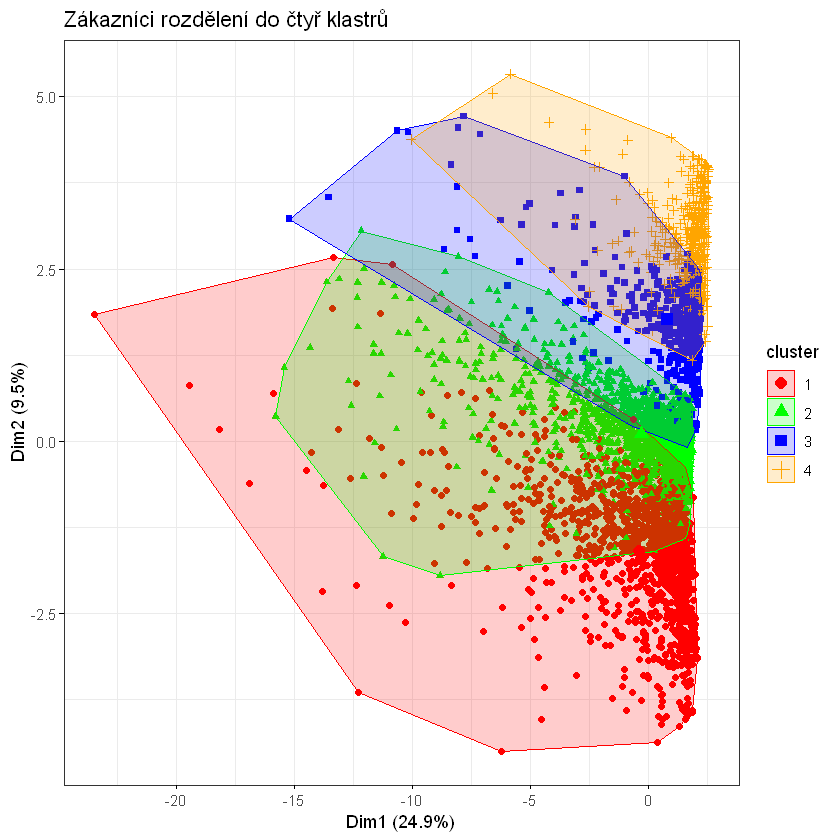

In [18]:
# Nyní si promítneme klastry do grafů

library(ggpubr) # Požadované knihovny
library(factoextra) # Požadované knihovny

fviz_cluster(kmeans_fitovany, data = s,
             palette = c("red", "green", "blue", "orange"), 
             geom = "point",
             ellipse.type = "convex", 
             ggtheme = theme_bw(), main="Zákazníci rozdělení do čtyř klastrů"
)

# Podobně jako u následujících grafu jde o více dimenzionální 
# pohled a osy x, y tedy nelze snadno interpretovat.
# Rozřazení do klastrů nicméně odhalilo skupiny, 
# které vykazují vzájemně odlišné vlastnosti. 
# Co vyčíst můžeme, je informace, že klastr 
# zákazníků č.1 a č.2 se nejvíce podílí na objemech nákupů. 
# U 3 a 4 jsou čísla nižší. Později zasadíme klastry 
# do kontextu k vybraným kategoriím zboží (za účelem ověření).

Warning message:
"ggrepel: 4194 unlabeled data points (too many overlaps). Consider increasing max.overlaps"


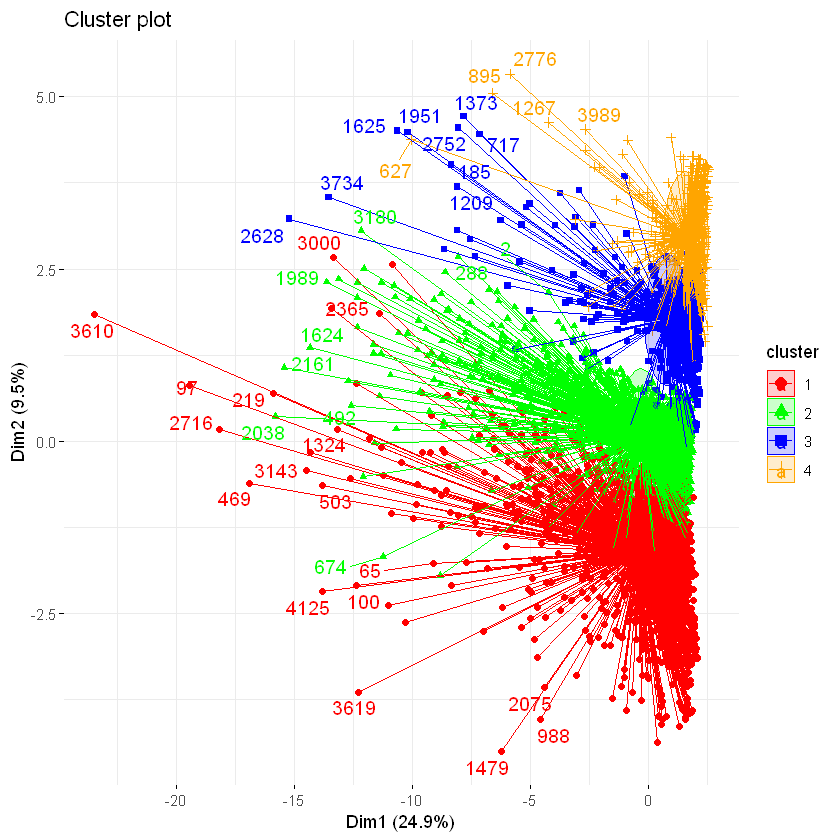

In [19]:
# Zkusme vykreslit paprskovitý graf pro dané klastry

fviz_cluster(kmeans_fitovany, data = s,
             palette = c("red", "green", "blue", "orange"), 
             # Barvy je potřeba nechat ve stejném pořadí jako výše
             ellipse.type = "euclid",
             star.plot = TRUE, 
             repel = TRUE, 
             ggtheme = theme_minimal())

In [93]:
# Nyní budeme zjišťovat, čím se jednotlivé klastry vyznačují a čím se liší.
# Protože jsou nyní zákazníci v datasetu zařazeni do čtyř klastrů, 
# pomůže nám to poskytnout doporučení pro marketingový tým.

# Samotný sloupec zákazníci pro nás nenese žádnou informaci, 
# všechna označení zákazníků jsou unikátní, 
# pravděpodobně slouží jen jako primární klíč databáze.

# Sloupce nyní rozšířené o klastry:
colnames(s)

[1] "Zakaznik"                  "Audio_video"              
 [3] "Auto_moto"                 "Domaci_spotrebice"        
 [5] "Drogerie"                  "Dum_zahrada"              
 [7] "Hracky"                    "Knihy"                    
 [9] "Obleceni"                  "Ostatni"                  
[11] "PC_mobil"                  "Sport"                    
[13] "Vybaveni_domacnosti"       "CELKEM"                   
[15] "podil_Audio_video"         "podil_Auto_moto"          
[17] "podil_Domaci_spotrebice"   "podil_Drogerie"           
[19] "podil_Dum_zahrada"         "podil_Hracky"             
[21] "podil_Knihy"               "podil_Obleceni"           
[23] "podil_Ostatni"             "podil_PC_mobil"           
[25] "podil_Sport"               "podil_Vybaveni_domacnosti"
[27] "cluster"

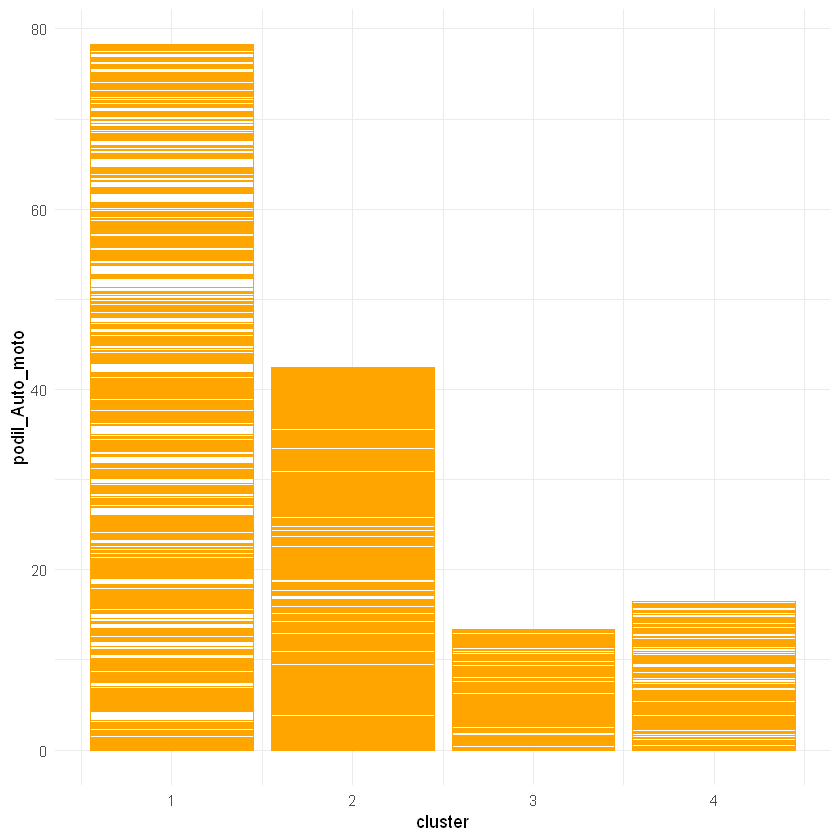

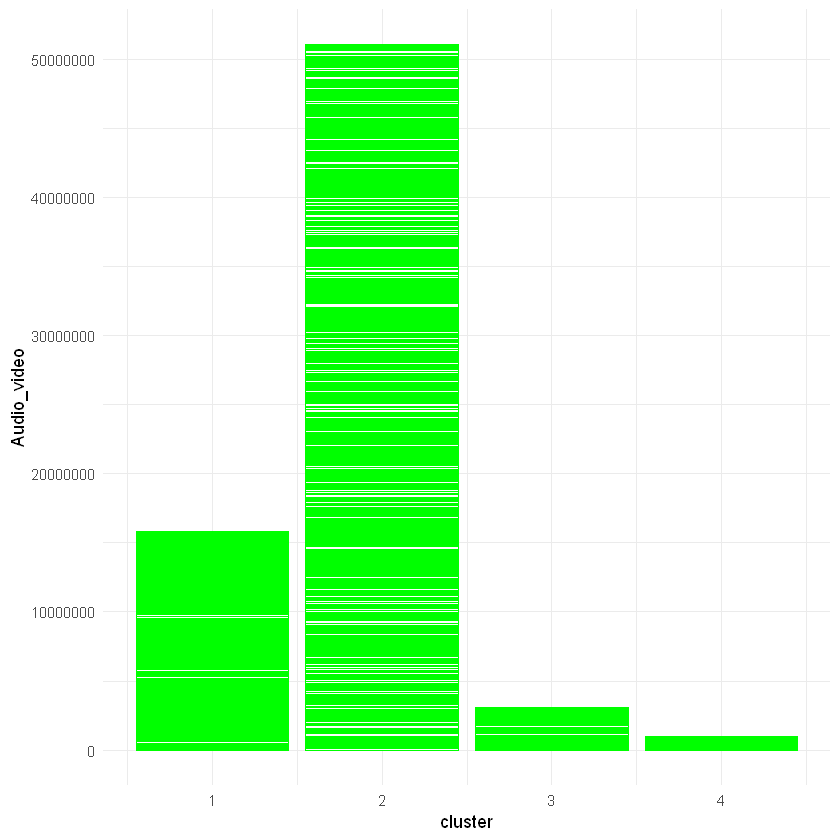

In [105]:
options(scipen = 999)
library(scales)
library(ggplot2)

par(mfrow=c(2,2))

ggplot(s, aes(x=cluster, y=podil_Auto_moto)) +
  geom_bar(stat = "identity",color="orange", fill="white") + theme_minimal()

# První klastr dominuje v oblasti Auto_moto

ggplot(s, aes(x=cluster, y=Audio_video)) +
  geom_bar(stat = "identity",color="green", fill="white") + theme_minimal()

# Druhý klastr se zaměřuje na nákupy audio a video výrobků.


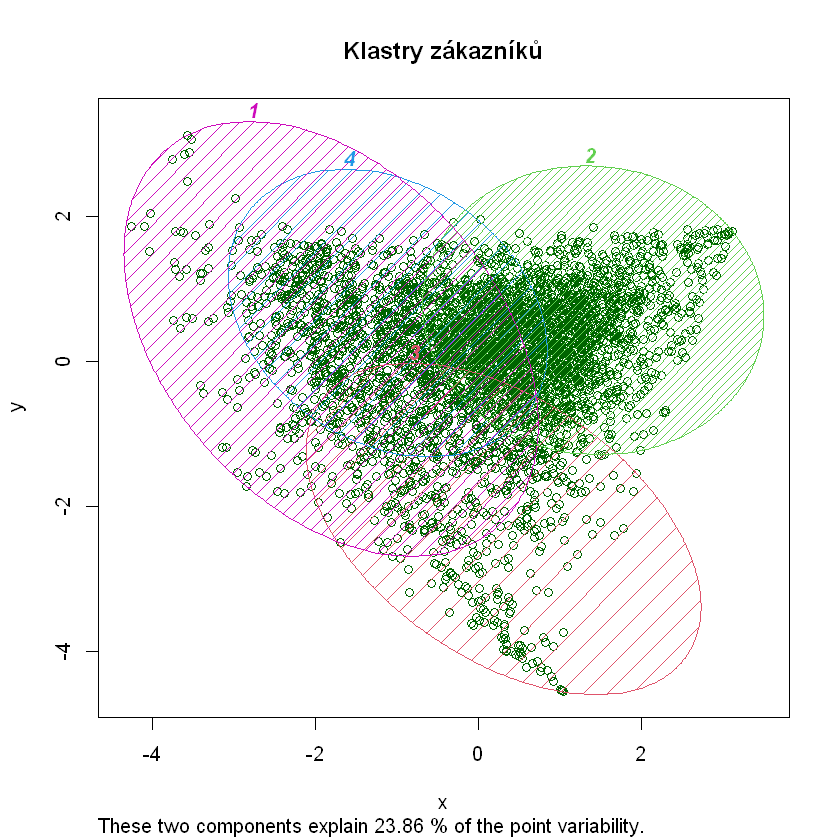

In [96]:
library(cluster)


# Jiný pohled na klastry

clusplot(klastry,
         s$cluster,
         lines = 0,
         shade = TRUE,
         color = T,
         labels = 4,
         plotchar = FALSE,
         span = TRUE,
         main = paste('Klastry zákazníků'),
         xlab = 'x',
         ylab = 'y')

# Je třeba myslet na to, že klastry jsou kategorie,
# které se snažíme "napasovat" na data. 
# Kategorie, které ve skutečnosti neexistují, 
# mohou nám však pomoci s rozlišením jinak spojitých pozorování dat.

In [ ]:
plot(s, ylim = c(-5,5), xlim = c(-5,5), col = 'green', main = 'Original Data')
points(y, col = 'red')

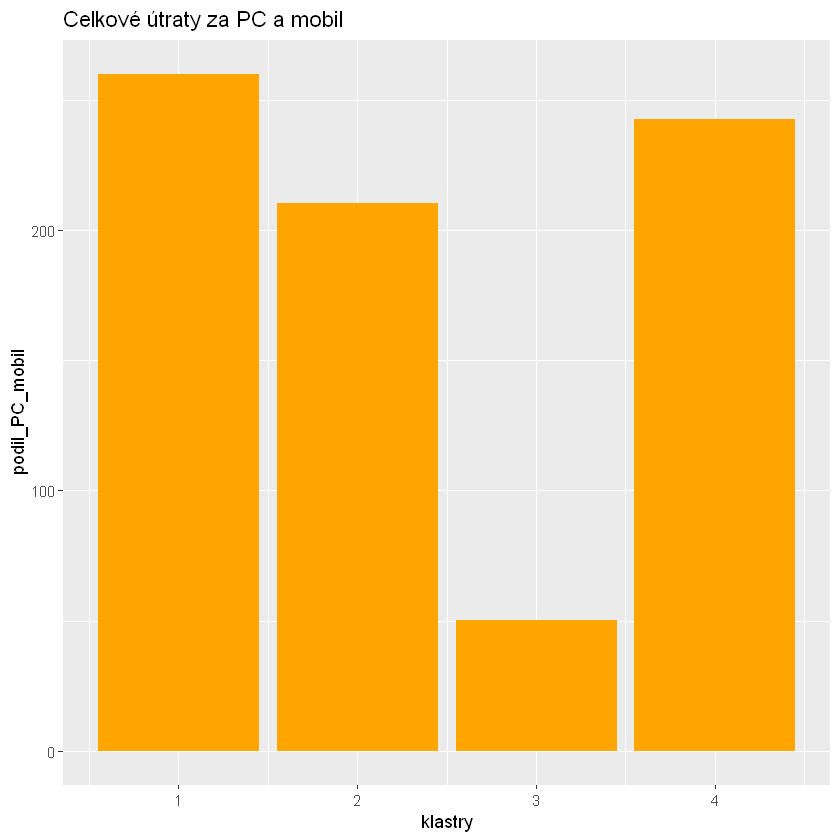

In [45]:
# Klastry dle útrat za PC a mobil, 
# třetí klastr v tomto případě nebude výnosnou skupinou zákazníků

ggplot(s, aes(x = cluster, y = podil_PC_mobil)) +
  geom_bar(stat = "identity", fill = "orange") +
  labs(x = "klastry", y = "podil_PC_mobil") +
  ggtitle("Celkové útraty za PC a mobil")

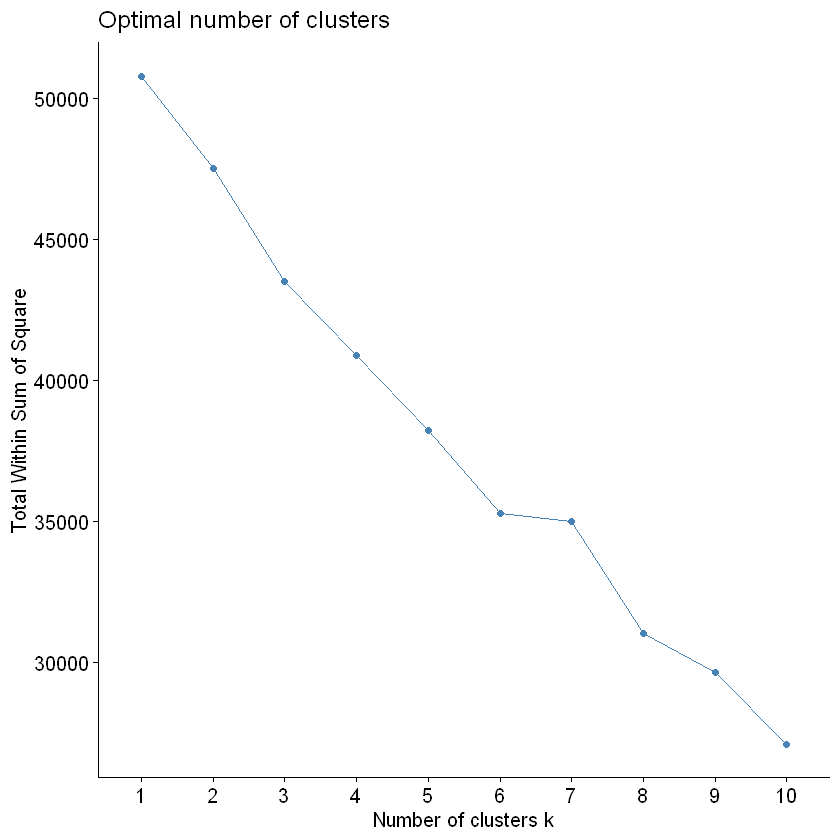

In [120]:
# Pro odhad optimálního počtu klastrů a 
# odlišný způsob vizualizace klastrů jsme odzkoušeli následující příkazy

podily = s[,15:26]

skalovano = scale(podily)

library(factoextra)
library(cluster)
fviz_nbclust(skalovano, kmeans, method = "wss")

set.seed(29)
kmean = kmeans(x = skalovano, centers = 4, nstart = 25)

k = kmean$cluster

In [ ]:
# Optimální počet klastrů se obvykle nachází 
# uprostřed nejstrmějšího zakřivení v grafu. 
# V našem případě je graf poměrně lineární.
# Tato pomůcka nám napovídá, že 6 klastrů by mohlo být optimum. 
# Budeme se však dále držet zadání úlohy.

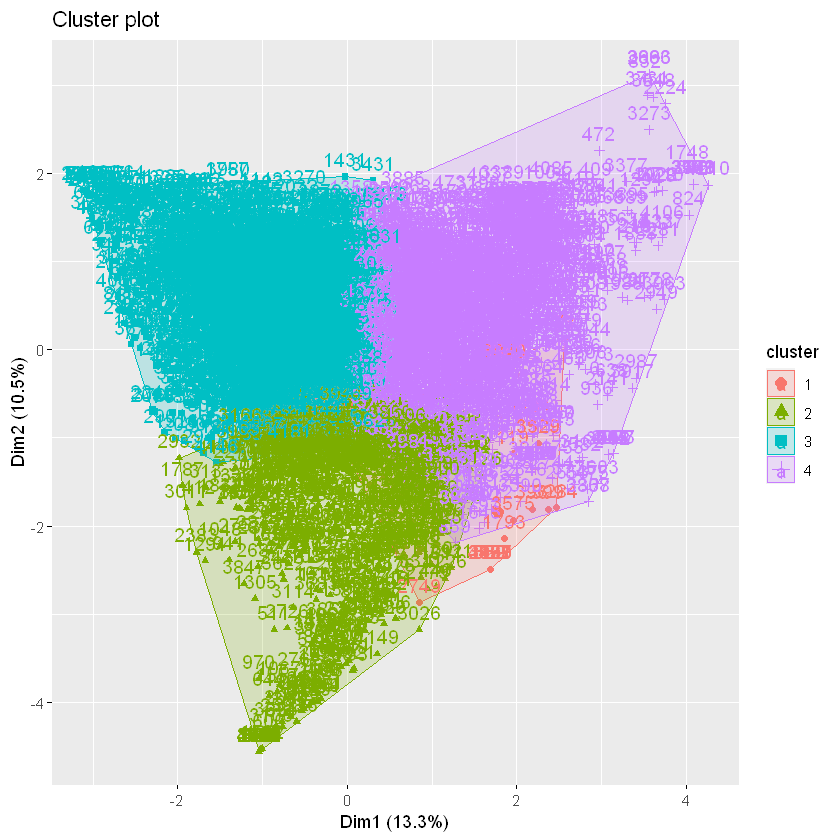

In [53]:
# Další multidimenzionální pohled

fviz_cluster(kmean, data = podily)

In [56]:
aggregate(podily, by=list(cluster=k$cluster), mean)

ERROR: Error in k$cluster: $ operator is invalid for atomic vectors


In [119]:
# Příklad s agregací nám pomůže porovnat dvě dříve zmíněné kategorie zboží

cluster_prumery <- aggregate(s[,15:26], by = list(k), mean)

In [118]:
# Agregovaná tabulka připomíná výsledek příkazu GROUP BY z SQL

cluster_prumery

Group.1,podil_Audio_video,podil_Auto_moto,podil_Domaci_spotrebice,podil_Drogerie,podil_Dum_zahrada,podil_Hracky,podil_Knihy,podil_Obleceni,podil_Ostatni,podil_PC_mobil,podil_Sport,podil_Vybaveni_domacnosti
<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,0.0192699,0.009426963,0.02081571,0.0005536352,0.00000000,0.02941002,0.73984420,0.03704620,0.007572499,0.02120912,0.06329477,0.05155699
2,0.1294230,0.027010434,0.53092674,0.0135094669,0.03541382,0.01809199,0.02178533,0.01934872,0.005373928,0.10700043,0.02256621,0.06954994
3,0.4836283,0.024609803,0.16193186,0.0137657214,0.03444879,0.01948207,0.01721503,0.02188104,0.004065215,0.13449266,0.02111298,0.06336648
4,0.1181598,0.057769501,0.11376354,0.0456325900,0.06788393,0.06005095,0.02092414,0.05189713,0.009810837,0.28914611,0.04727817,0.11768328


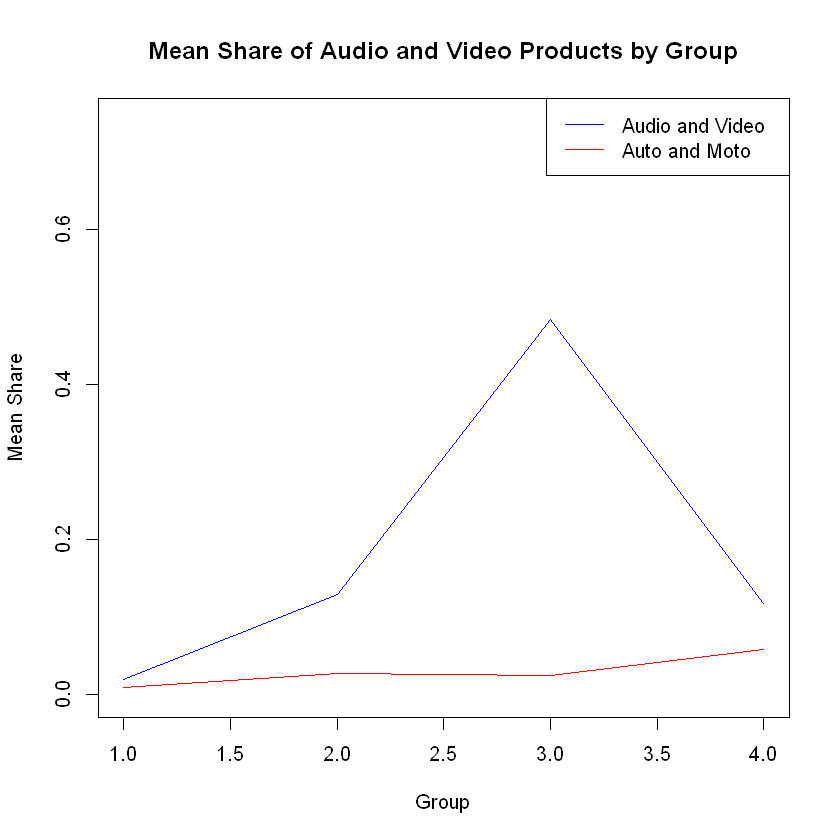

In [113]:
# Nyní zobrazíme v grafu

plot(cluster_prumery$Group.1, cluster_prumery$podil_Audio_video, type = "l", col = "blue",
     xlab = "Group", ylab = "Mean Share", ylim = c(0, max(cluster_prumery[, -1])),
     main = "Průměrný podíl dvou nejžádanějších kategorií zboží")
lines(cluster_prumery$Group.1, cluster_prumery$podil_Auto_moto, type = "l", col = "red")
legend("topright", legend = c("Audio and Video", "Auto and Moto"), col = c("blue", "red"), lty = 1)

In [67]:
final_data <- cbind(s, cluster = k)
head(final_data)

,Zakaznik,Audio_video,Auto_moto,Domaci_spotrebice,Drogerie,Dum_zahrada,Hracky,Knihy,Obleceni,Ostatni,...,podil_Drogerie,podil_Dum_zahrada,podil_Hracky,podil_Knihy,podil_Obleceni,podil_Ostatni,podil_PC_mobil,podil_Sport,podil_Vybaveni_domacnosti,cluster
,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,...,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<int>
1,12347,89233.2,3036.2,41388.6,1293.6,3795.6,2923.5,2093.4,1549.8,656.0,...,0.007133746,0.020931391,0.016122068,0.011544360,0.008546598,0.003617608,0.1503116,0.00996276,0.03475330,3
2,12348,122032.8,480.0,49216.0,0.0,1915.2,0.0,0.0,2443.2,0.0,...,0.000000000,0.008053718,0.000000000,0.000000000,0.010274042,0.000000000,0.2170265,0.00000000,0.04249901,3
3,12349,22674.0,1309.5,1437.6,78.0,360.0,437.1,2522.4,704.4,238.1,...,0.001827421,0.008434251,0.010240587,0.059095989,0.016503019,0.005578320,0.2137005,0.04474370,0.04429856,3
4,12350,2948.4,925.2,954.0,0.0,301.2,81.6,79.2,572.4,0.0,...,0.000000000,0.037902049,0.010268284,0.009966276,0.072028993,0.000000000,0.0000000,0.04406805,0.21827654,3
5,12352,15615.7,343.0,5156.4,49.8,3283.8,346.5,219.6,298.8,144.0,...,0.001409754,0.092958871,0.009808834,0.006216508,0.008458527,0.004076398,0.2072396,0.02479809,0.04730038,3
6,12353,0.0,0.0,0.0,0.0,0.0,50.4,0.0,0.0,0.0,...,0.000000000,0.000000000,0.283783784,0.000000000,0.000000000,0.000000000,0.0000000,0.71621622,0.00000000,4



 1  2  3  4  5  8 18 20 32 
 1  2  3  1  1  1  1  1  1 

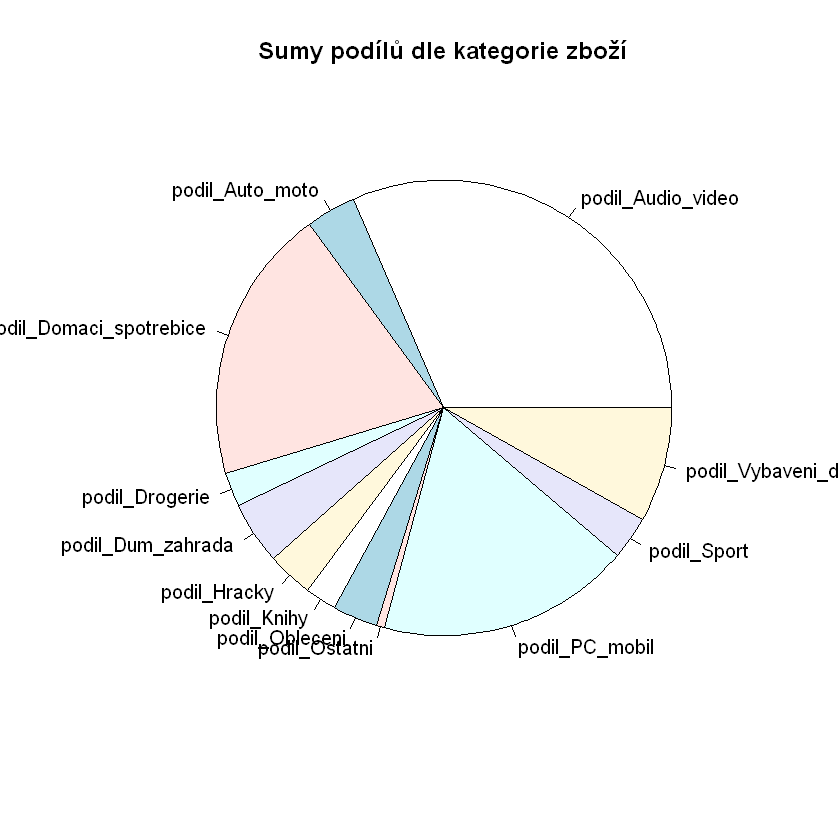

In [86]:
# Podívejme se na relativní zastoupení kategorií, nyní bez ohledu na klastry

i <- s[,15:26]

library(ggrepel)
library(tidyverse)
library(scales)

sums <- colSums(i)
pie(sums, labels = names(sums), main = "Sumy podílů dle kategorie zboží")

df2 <- data.frame(Category = names(sums), Value = sums)

df2$Percent <- df2$Value / sum(df2$Value) * 100

table(round(df2$Percent))

# Vidíme, že nejvyšší popularitu mají nákupy v kategorii audia a videa (32 %), 
# domácích spotřebičů (20 %) a počítačů / mobilů (18 %).
# Vybavení do domácnosti také není zanedbatelné (8 %).

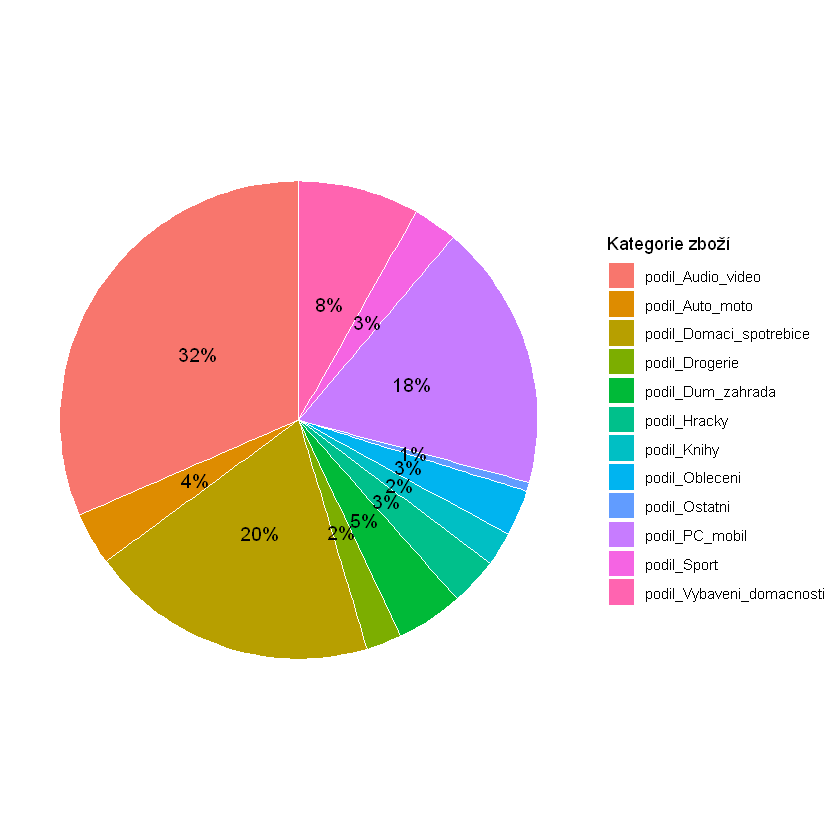

In [72]:
# Procentuální alternativa v ggplotu

ggplot(df2, aes(x = "", y = Value, fill = Category)) +
  geom_bar(stat = "identity") + 
  geom_col(color = "white") +
  coord_polar("y", start = 0) +
  labs(fill = "Kategorie zboží", y = "Value") +
  scale_y_continuous(labels = percent_format()) +
  theme_void() +
  geom_text(aes(label = paste0(round(Percent), "%")), 
            position = position_stack(vjust = 0.5), size = 4)